In [1]:
# Import PyTorch core libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Import torchvision for datasets and transforms
import torchvision
import torchvision.transforms as transforms

# Import DataLoader for batching
from torch.utils.data import DataLoader

In [2]:
# Define transformations for the dataset (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Download and load the test dataset
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create DataLoaders for batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Number of training samples: 60000
Number of test samples: 10000


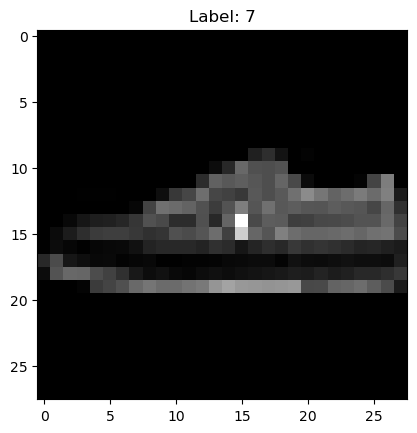

In [3]:
# Check the number of samples in the training and test datasets
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

# Visualize a sample image and its label
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.show()

In [4]:
# Define a simple feedforward fully connected neural network
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)   # Input layer to hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)      # Hidden layer to another hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)       # Output layer (10 classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate the model
model = FeedforwardNN()
print(model)

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
model.to('cuda' if torch.cuda.is_available() else 'cpu')

FeedforwardNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
# Print the device the model is on
print(next(model.parameters()).device)

cpu


In [7]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.5163
Epoch [2/10], Loss: 0.3785
Epoch [3/10], Loss: 0.3412
Epoch [4/10], Loss: 0.3178
Epoch [5/10], Loss: 0.2965
Epoch [6/10], Loss: 0.2838
Epoch [7/10], Loss: 0.2692
Epoch [8/10], Loss: 0.2581
Epoch [9/10], Loss: 0.2471
Epoch [10/10], Loss: 0.2389


In [8]:
# Evaluate test accuracy after training
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 88.31%
